In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font='IPAexGothic')
%matplotlib inline
np.random.seed(0)

C:\Users\TEMP.MYCOMPUTER.004\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# df作成

In [2]:
s1 = pd.Series([34, 23, 53], index=['ONE', 'TWO', 'THREE'], name='X')
display(s1)
s2 = pd.Series([12, 2, 3], index=['TWO', 'THREE', 'FOUR'], name='Y')
display(s2)
s3 = pd.Series([0, 4, 2], index=['THREE', 'FOUR', 'FIVE'], name='Z')
display(s3)
slist = [s1, s2, s3]

ONE      34
TWO      23
THREE    53
Name: X, dtype: int64

TWO      12
THREE     2
FOUR      3
Name: Y, dtype: int64

THREE    0
FOUR     4
FIVE     2
Name: Z, dtype: int64

In [3]:
def make_df(series_list):
    df = pd.concat(slist, axis=1).fillna('0').astype('int').sort_values('X',ascending=False)
    df_largest = df[:3]
    df_others = df.drop(df_largest.index)
    df_others_sum = pd.DataFrame(df_others.sum().values,columns=['Others'],index=df.columns)
    
    return pd.concat([df_largest, df_others_sum.T])

df = make_df(slist)
display(df)

,X,Y,Z
THREE,53,2,0
ONE,34,0,0
TWO,23,12,0
Others,0,3,6


In [4]:
def make_df2(series_list):
    df = pd.concat(slist, axis=1).fillna('0').astype('int').sort_values('X')
    df_largest = df[-3:]
    df_others = df.drop(df_largest.index)
    df_others_sum = pd.DataFrame(df_others.sum().values,columns=['Others'],index=df.columns)
    
    return pd.concat([df_others_sum.T, df_largest])

df2 = make_df2(slist)
display(df2)

,X,Y,Z
Others,0,3,6
TWO,23,12,0
ONE,34,0,0
THREE,53,2,0


In [5]:
def standardization(df):
    for col in df.columns.tolist():
        df[col] = 100 * df[col] / df[col].sum()
    return df
            
df_new = standardization(df)
df2_new = standardization(df2)
display(df_new)
display(df2_new)

,X,Y,Z
THREE,48.181818,11.764706,0.0
ONE,30.909091,0.000000,0.0
TWO,20.909091,70.588235,0.0
Others,0.000000,17.647059,100.0


,X,Y,Z
Others,0.000000,17.647059,100.0
TWO,20.909091,70.588235,0.0
ONE,30.909091,0.000000,0.0
THREE,48.181818,11.764706,0.0


findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


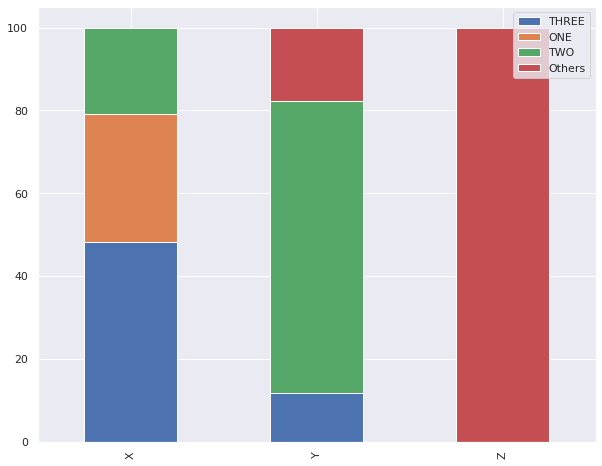

In [6]:
fig, ax = plt.subplots(figsize=(10, 8))
df_new.T.plot(kind='bar', stacked=True, ax=ax)
plt.show()

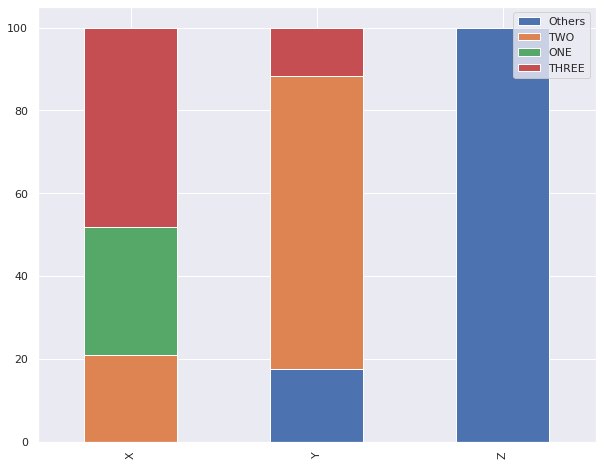

In [7]:
fig, ax = plt.subplots(figsize=(10, 8))
df2_new.T.plot(kind='bar', stacked=True, ax=ax)
plt.show()